### Support Vector Machine Model
### Support Vector Classifier (SVC)
### IRIS dataset
#### https://gist.github.com/netj/8836201

In [1]:
# importing Libraries
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load data set
iris = datasets.load_iris()
X = iris.data  # Features (150 samples, 4 features)
y = iris.target  # Target (0, 1, 2 for the three flower species)


In [3]:
df = pd.DataFrame(X, columns=iris.feature_names)
df['species'] = y
print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


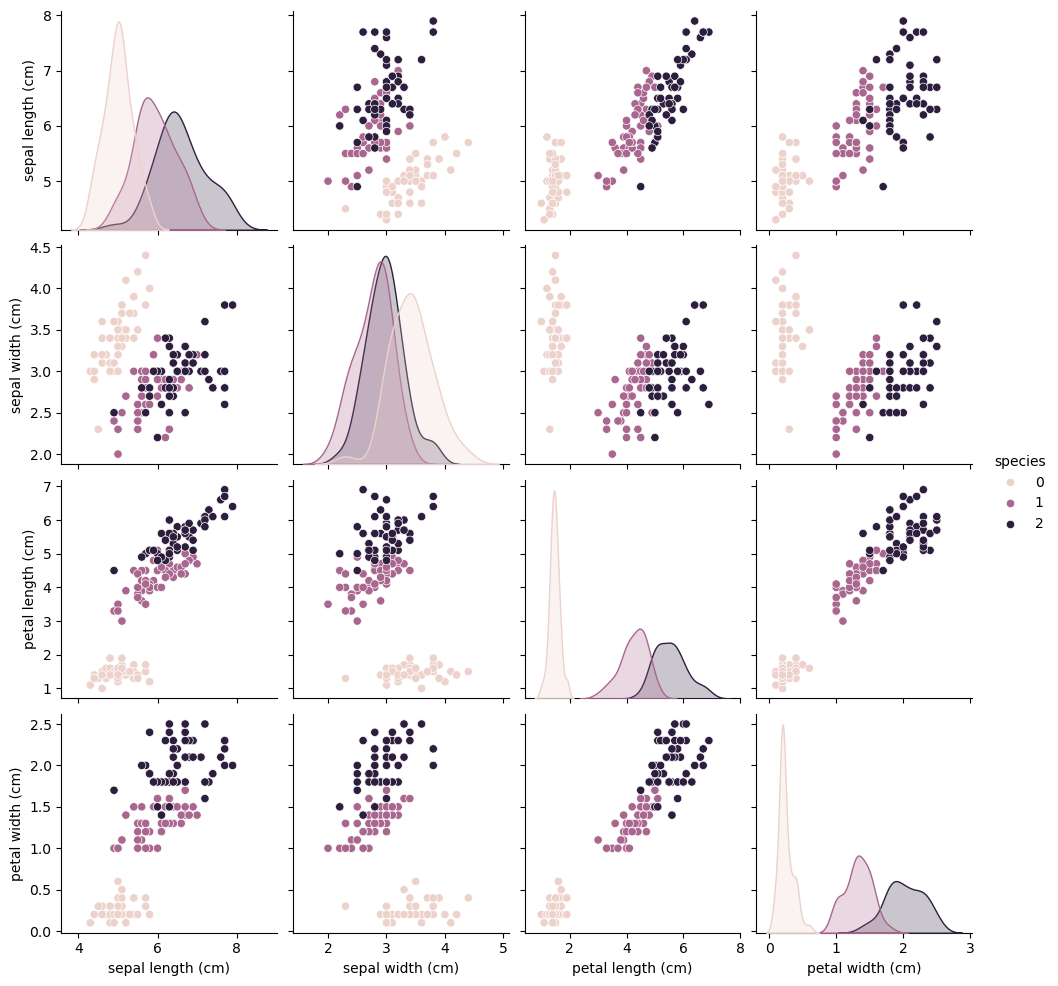

In [4]:
sns.pairplot(df, hue='species')
plt.show()

In [5]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
# Train
model = SVC(kernel='linear', C=1.0)  # Linear kernel for simplicity
model.fit(X_train, y_train)


SVC(kernel='linear')

In [7]:
# Make predictions
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [8]:
# Plot the boundary
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(10, 6))

X_train_2d = X_train[:, [0, 1]]  # Use only first 2 features
model_2d = SVC(kernel='linear', C=1.0)
model_2d.fit(X_train_2d, y_train)


SVC(kernel='linear')

<Figure size 1000x600 with 0 Axes>

In [9]:
from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(10, 6))

X_train_2d = X_train[:, [0, 1]]  # Use only first 2 features
model_2d = SVC(kernel='linear', C=1.0)
model_2d.fit(X_train_2d, y_train)


SVC(kernel='linear')

<Figure size 1000x600 with 0 Axes>

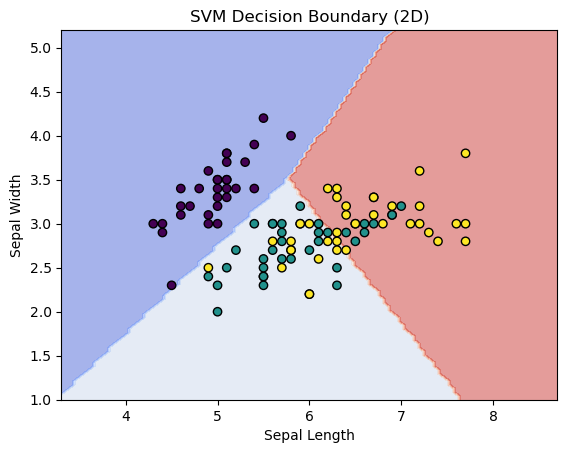

In [10]:
DecisionBoundaryDisplay.from_estimator(
    model_2d,
    X_train_2d,
    response_method="predict",
    cmap='coolwarm',
    alpha=0.5
)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary (2D)')
plt.show()


In [12]:
# New data point (e.g., Sepal Length = 5.1, Sepal Width = 3.5)
new_data = np.array([[5.1, 3.5]])



In [13]:
# Predict the class of the new data point
new_prediction = model_2d.predict(new_data)
print(f"Predicted class for the new data point: {new_prediction}")


Predicted class for the new data point: [0]


<Figure size 1000x600 with 0 Axes>

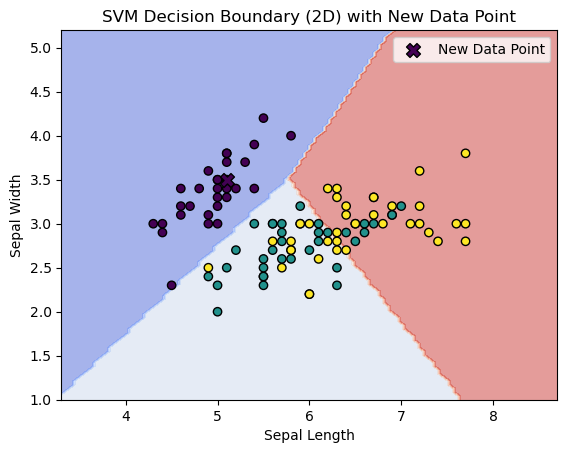

In [15]:
# Plot the decision boundary again and add the new data point
plt.figure(figsize=(10, 6))

DecisionBoundaryDisplay.from_estimator(
    model_2d,
    X_train_2d,
    response_method="predict",
    cmap='coolwarm',
    alpha=0.5
)
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, edgecolors='k')

# Plot the new data point
plt.scatter(new_data[0][0], new_data[0][1], c=new_prediction, edgecolors='k', marker='X', s=100, label='New Data Point')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('SVM Decision Boundary (2D) with New Data Point')
plt.legend()
plt.show()
